In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as ply
import json
import urllib
import requests as req
from citipy import citipy as cp

In [48]:
latLon = [] 

x = np.random.uniform(-90,90,1500)      #Latitudes range 
y = np.random.uniform(-180, 180,1500)   #Longitudes range
latLon = zip(x, y)

cityList = []

for i in latLon:
    city = cp.nearest_city(i[0], i[1]).city_name
    if city not in cityList:
        cityList.append(city)

In [49]:
apiKey = 'aa2b51e6196a31e385d4c816344885bd'
#apiKey = '26b6db097f30fe66ba9414d1a1f41b17'
apiUrl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +apiKey

In [55]:
count = 0
weatherDf = []

for i, city in enumerate(cityList):
    cityURL = apiUrl + "&q=" + urllib.request.pathname2url(city)   
    count += 1
    #print(cityURL)
    try:
        data = req.get(cityURL).json() 
        lati = data["coord"]["lat"]
        lngi = data["coord"]["lon"]
        maxTemp = data["main"]["temp_max"]
        humidity = data["main"]["humidity"]
        clouds = data["clouds"]["all"]
        wind = data["wind"]["speed"]
        country = data["sys"]["country"]
        date = data["dt"]
        #fill in the weather data frame        
        weatherDf.append({"Latitude":lati,"Longitude":lngi, "Humidity":humidity, "Wind":wind, "Clouds":clouds,
                                  "City_name":city, "Temperature":maxTemp})
    except:
        #print("City not found...")
        pass        

In [56]:
weatherDfNew =  pd.DataFrame(weatherDf)
weatherDfNew.to_csv("weatherData.csv", sep=',', encoding='utf-8')
weatherDfNew.head()

,City_name,Clouds,Humidity,Latitude,Longitude,Temperature,Wind
0,nantucket,75,48,41.28,-70.10,42.80,6.93
1,arraial do cabo,40,69,-22.97,-42.02,82.40,11.41
2,yerbogachen,36,78,61.28,108.01,16.75,3.83
3,lorengau,0,100,-2.02,147.27,81.37,5.39
4,sinnamary,92,93,5.38,-52.96,81.00,9.75


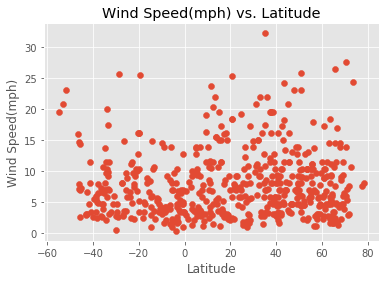

In [57]:
plt.scatter(weatherDfNew['Latitude'], weatherDfNew['Wind'])
plt.title(f"Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
#plt.style.use('presentation')
#plt.style.use(['dark_background', 'presentation'])
plt.savefig("Wind_Speed.png")
plt.show()

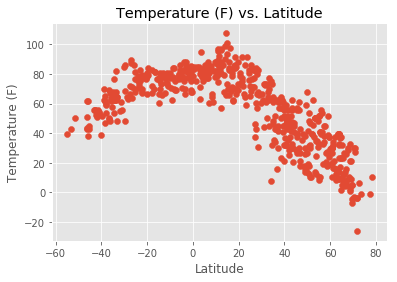

In [58]:
#scatter plot (latitude,Temperature)
plt.scatter(weatherDfNew['Latitude'],weatherDfNew['Temperature'])
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

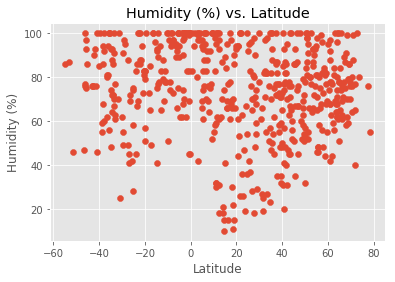

In [59]:
#scatter plot (latitude,humidity)
plt.scatter(weatherDfNew['Latitude'], weatherDfNew['Humidity'])
plt.title(f"Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

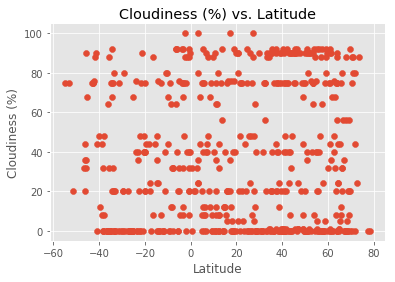

In [60]:
#scatter plot (latitude,cloudy)
plt.scatter(weatherDfNew['Latitude'], weatherDfNew['Clouds'])
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()